<a target="_blank" href="https://colab.research.google.com/github/giordamaug/WisardLib4Python/blob/main/test_classifier.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Installation

In [ ]:
!git clone https://github.com/giordamaug/WisardLib4Python.git
%cd WisardLib4Python
!pip install pybind11
!python setup.py build_ext --inplace 

## Load the dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
from sklearn import preprocessing
target = "medv"
X = np.array(df.drop(target, axis=1))
y = df[target].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Cross validation

5-fold Cross Validation...
--- 1.5968081951141357 seconds ---
WiSARDRegressor(n_tics: 1024, n_bits:, 16, n_rams: 0)



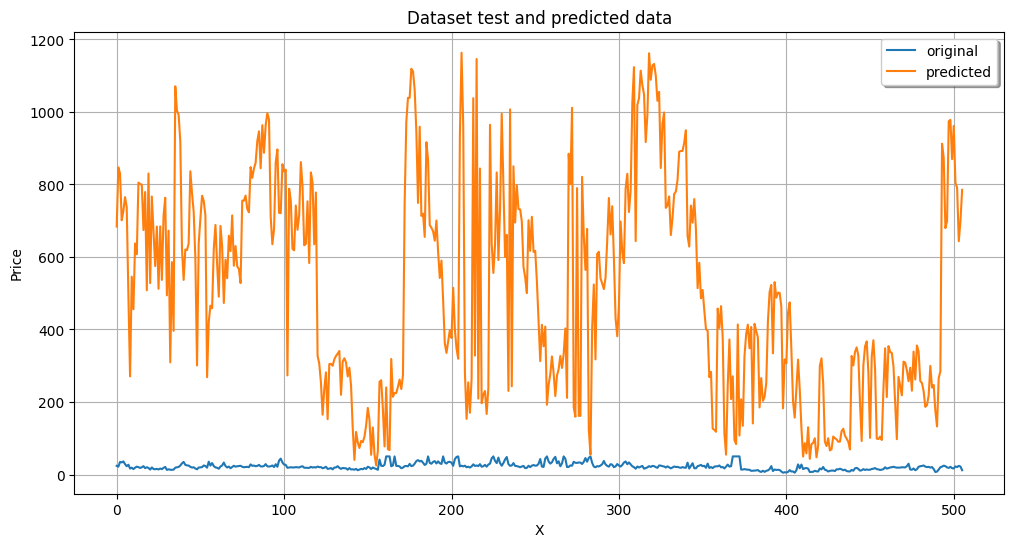

In [4]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_predict
from sklearnapi import WiSARDRegressor
from utilities import plot_confusion_matrix
import matplotlib.pyplot as plt
import time 
regr = WiSARDRegressor(n_bits=16, n_tics=1024, 
                       random_state=0, code='t', debug=False)
start = time.time()
folds = 5
print(f"{folds}-fold Cross Validation...")
y_pred = cross_val_predict(regr, X, y, cv=folds)
targets = y
print("--- %s seconds ---" % (time.time() - start))
print(f'{regr}')
x_ax = range(len(targets))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, targets, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  